In [169]:
# carregar as bibliotecas necessárias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tabulate import tabulate

In [170]:
# ler cada uma das sheets e criar um dataframe para cada uma delas

df_INPUT = pd.read_excel("Input_Updated.xlsx", sheet_name="Sheet1")

# imprime o número de linhas e colunas do dataframe
print(df_INPUT.shape)

# apresentar as primeiras 5 linhas do dataframe "df_INPUT"
df_INPUT.head()

(100, 36)


,PC1,PC2,PC3,PC4,PC5,QC1,QC2,QC3,QC4,QC5,...,Rz45,Xz12,Xz13,Xz14,Xz23,Xz45,Sb,Ub2,PG1,QG1
0,80.000000,90.000000,60.000000,50.000000,50.000000,20.000000,20.000000,10.000000,10.000000,10.000000,...,0.900000,18.000000,18.000000,9.000000,9.000000,9.000000,100,150,20.000000,10.000000
1,75.985284,106.225715,65.567855,51.973170,43.120373,17.247956,16.464669,11.464705,10.404460,10.832290,...,0.845941,18.051244,18.332692,8.183611,9.193581,8.406943,100,150,16.520413,11.795542
2,94.900225,101.102305,55.310730,41.953442,53.684661,19.521220,16.976306,9.980708,8.137554,11.637282,...,0.879962,17.176857,19.183455,8.742156,8.605682,9.076853,100,150,17.127394,11.208788
3,66.385621,107.527930,66.533874,43.974314,40.110442,22.523691,21.654859,10.916029,11.085081,8.296179,...,0.948774,17.977664,18.081838,8.869574,8.145754,8.294205,100,150,16.251433,10.545642
4,74.059391,90.308545,69.781595,44.985845,48.207658,22.044409,17.830385,8.307920,9.159006,8.644885,...,0.811251,18.038690,17.702680,8.499794,8.315758,8.707707,100,150,23.543278,9.292812


In [171]:
# Criando o dataset para potências consumidas (PC1 a PC5)
df_potencias_consumidas = df_INPUT.filter(regex='^PC')

# Criando o dataset para potências reativas consumidas (QC1 a QC5)
df_potencias_reativas = df_INPUT.filter(regex='^QC')

# Criando o dataset para resistências de linha (Rz12 a Rz45)
df_resistencias_linhas = df_INPUT.filter(regex='^Rz')

# Criando o dataset para reatâncias de linha (Xz12 a Xz45)
df_reatancias_linhas = df_INPUT.filter(regex='^Xz')

# Exemplo de como visualizar um dos datasets criados
print("Dataset de Potências Consumidas:")
print(df_potencias_consumidas)

print("\nDataset de Potências Reativas Consumidas:")
print(df_potencias_reativas)

print("\nDataset de Resistências de Linha:")
print(df_resistencias_linhas)

print("\nDataset de Reatâncias de Linha:")
print(df_reatancias_linhas)

Dataset de Potências Consumidas:
          PC1         PC2        PC3        PC4        PC5
0   80.000000   90.000000  60.000000  50.000000  50.000000
1   75.985284  106.225715  65.567855  51.973170  43.120373
2   94.900225  101.102305  55.310730  41.953442  53.684661
3   66.385621  107.527930  66.533874  43.974314  40.110442
4   74.059391   90.308545  69.781595  44.985845  48.207658
..        ...         ...        ...        ...        ...
95  94.115866  103.547500  50.461631  47.854615  51.067424
96  80.615186   93.879097  53.888456  41.154643  47.820657
97  89.368260   74.485653  59.382121  51.213566  52.568529
98  76.015006  100.937324  58.403334  59.943647  51.181186
99  69.436192   79.019107  69.369828  54.999556  58.164570

[100 rows x 5 columns]

Dataset de Potências Reativas Consumidas:
          QC1        QC2        QC3        QC4        QC5
0   20.000000  20.000000  10.000000  10.000000  10.000000
1   17.247956  16.464669  11.464705  10.404460  10.832290
2   19.521220  16.

In [172]:
def create_variables_for_each_row(file_path):
    # Ler o arquivo Excel
    df = pd.read_excel(file_path)
    
    # Lista para armazenar os dicionários de variáveis de cada linha
    variables_list = []
    
    # Iterar sobre cada linha do DataFrame
    for index, row in df.iterrows():
        # Criar um dicionário para armazenar as variáveis da linha atual
        variables = {}
        for col_name in df.columns:
            variables[col_name] = row[col_name]
        
        # Adicionar o dicionário de variáveis da linha atual à lista
        variables_list.append(variables)
    
    return variables_list

file_path = 'Input_Updated.xlsx'

# Chamando a função modificada
variables_list = create_variables_for_each_row(file_path)

# Exemplo de acesso aos dados: imprimir 'PC1' da primeira linha
print(variables_list[0]['PC1'])


80.0


In [173]:
# Lista para armazenar os resultados de cada linha
results_list = []

for variables in variables_list:
    # Cálculo das zonas de tensão para a linha atual
    Sb = variables["Sb"]
    Ub2 = variables["Ub2"]
    Ub1 = (variables["PriT1"] / variables["SecT1"]) * Ub2
    Ub3 = (variables["PriT2"] / variables["SecT2"]) * Ub2
    Ub4 = round((variables["PriT3"] / variables["SecT3"]) * Ub2, 2)
    
    # Adicionar os resultados ao DataFrame acumulativo
    results_list.append({
        "Sb": Sb,
        "Ub1": Ub1,
        "Ub2": Ub2,
        "Ub3": Ub3,
        "Ub4": Ub4
    })

# Converter a lista de resultados em um DataFrame
df_pu = pd.DataFrame(results_list)

# Exibir os primeiros resultados para verificação
df_pu.head()

,Sb,Ub1,Ub2,Ub3,Ub4
0,100.0,60.000000,150.0,60.000000,14.80
1,100.0,66.834133,150.0,54.536913,13.27
2,100.0,66.401051,150.0,47.934634,16.81
3,100.0,47.342791,150.0,51.471194,14.49
4,100.0,65.643472,150.0,48.657494,17.80


In [174]:
# Cálculo do transformadores 
for i, variables in enumerate(variables_list):
    Ub1 = df_pu.at[i, "Ub1"]
    Ub2 = df_pu.at[i, "Ub2"] 
    Ub3 = df_pu.at[i, "Ub3"]
    Ub4 = df_pu.at[i, "Ub4"]
    
    X1 = complex(0, (variables["xT1"] / 100) * (variables["Sb"] / variables["ST1"]) * (variables["PriT1"] / Ub1) ** 2)
    X2 = complex(0, (variables["xT2"] / 100) * (variables["Sb"] / variables["ST2"]) * (variables["PriT2"] / Ub3) ** 2)
    X3 = complex(0, round((variables["xT3"] / 100) * (variables["Sb"] / variables["ST3"]) * (variables["PriT3"] / Ub4) ** 2, 4))
    
    # Atualizar o DataFrame 'df_pu' com os novos valores
    df_pu.at[i, "X1"] = X1
    df_pu.at[i, "X2"] = X2
    df_pu.at[i, "X3"] = X3

# Exibir as primeiras linhas do DataFrame atualizado para verificação
df_pu.head()


,Sb,Ub1,Ub2,Ub3,Ub4,X1,X2,X3
0,100.0,60.000000,150.0,60.000000,14.80,0.000000+0.030000j,0.000000+0.030000j,0.0000+0.0411j
1,100.0,66.834133,150.0,54.536913,13.27,0.000000+0.035569j,0.000000+0.029726j,0.0000+0.0404j
2,100.0,66.401051,150.0,47.934634,16.81,0.000000+0.029309j,0.000000+0.037525j,0.0000+0.0426j
3,100.0,47.342791,150.0,51.471194,14.49,0.000000+0.036397j,0.000000+0.027742j,0.0000+0.0454j
4,100.0,65.643472,150.0,48.657494,17.80,0.000000+0.031283j,0.000000+0.033156j,0.0000+0.0331j


In [175]:
# Cálculo das linhas

for i, variables in enumerate(variables_list):
    # Recalcular Zb2 para cada linha, já que Ub2 e Sb podem variar
    Zb2 = (variables["Ub2"]) ** 2 / variables["Sb"]
    
    # Calcular as impedâncias das linhas para a linha atual
    Z12 = complex(variables["Rz12"], variables["Xz12"]) / Zb2
    Z13 = complex(variables["Rz13"], variables["Xz13"]) / Zb2
    Z14 = complex(variables["Rz14"], variables["Xz14"]) / Zb2
    Z23 = complex(variables["Rz23"], variables["Xz23"]) / Zb2
    Z45 = complex(variables["Rz45"], variables["Xz45"]) / Zb2
    
    # Calcular a carga líquida C1 para a linha atual
    P_C1 = complex(variables["PC1"], variables["QC1"]) - complex(variables["PG1"], variables["QG1"])
    
    # Atualizar o DataFrame 'df_pu' com os novos valores calculados
    df_pu.at[i, "Z12"] = Z12
    df_pu.at[i, "Z13"] = Z13
    df_pu.at[i, "Z14"] = Z14
    df_pu.at[i, "Z23"] = Z23
    df_pu.at[i, "Z45"] = Z45
    df_pu.at[i, "P_C1"] = round(P_C1.real, 0) / variables["Sb"]
    df_pu.at[i, "Q_C1"] = round(P_C1.imag, 0) / variables["Sb"]

# Exibir as primeiras linhas do DataFrame atualizado para verificação
df_pu.head()


,Sb,Ub1,Ub2,Ub3,Ub4,X1,X2,X3,Z12,Z13,Z14,Z23,Z45,P_C1,Q_C1
0,100.0,60.000000,150.0,60.000000,14.80,0.000000+0.030000j,0.000000+0.030000j,0.0000+0.0411j,0.008000+0.080000j,0.008000+0.080000j,0.004000+0.040000j,0.004000+0.040000j,0.004000+0.040000j,0.60,0.10
1,100.0,66.834133,150.0,54.536913,13.27,0.000000+0.035569j,0.000000+0.029726j,0.0000+0.0404j,0.007667+0.080228j,0.007786+0.081479j,0.003965+0.036372j,0.004228+0.040860j,0.003760+0.037364j,0.59,0.05
2,100.0,66.401051,150.0,47.934634,16.81,0.000000+0.029309j,0.000000+0.037525j,0.0000+0.0426j,0.007342+0.076342j,0.007514+0.085260j,0.003636+0.038854j,0.003860+0.038247j,0.003911+0.040342j,0.78,0.08
3,100.0,47.342791,150.0,51.471194,14.49,0.000000+0.036397j,0.000000+0.027742j,0.0000+0.0454j,0.007391+0.079901j,0.008341+0.080364j,0.004209+0.039420j,0.004049+0.036203j,0.004217+0.036863j,0.50,0.12
4,100.0,65.643472,150.0,48.657494,17.80,0.000000+0.031283j,0.000000+0.033156j,0.0000+0.0331j,0.007565+0.080172j,0.007883+0.078679j,0.004254+0.037777j,0.004289+0.036959j,0.003606+0.038701j,0.51,0.13


In [176]:
# Converter potências consumidas e reativas para pu diretamente usando 'df_potencias_consumidas' e 'df_potencias_reativas' e 'Sb' de cada linha
df_potencias_consumidas_pu = df_potencias_consumidas.div(df_INPUT["Sb"], axis=0)
df_potencias_reativas_pu = df_potencias_reativas.div(df_INPUT["Sb"], axis=0)

# Atualizar 'df_pu' com as novas colunas de potências consumidas e reativas em pu
df_pu = pd.concat([df_pu.reset_index(drop=True), df_potencias_consumidas_pu.reset_index(drop=True)], axis=1)
df_pu = pd.concat([df_pu.reset_index(drop=True), df_potencias_reativas_pu.reset_index(drop=True)], axis=1)

# Exibir as primeiras linhas do DataFrame atualizado para verificação
df_pu.head()


,Sb,Ub1,Ub2,Ub3,Ub4,X1,X2,X3,Z12,Z13,...,PC1,PC2,PC3,PC4,PC5,QC1,QC2,QC3,QC4,QC5
0,100.0,60.000000,150.0,60.000000,14.80,0.000000+0.030000j,0.000000+0.030000j,0.0000+0.0411j,0.008000+0.080000j,0.008000+0.080000j,...,0.800000,0.900000,0.600000,0.500000,0.500000,0.200000,0.200000,0.100000,0.100000,0.100000
1,100.0,66.834133,150.0,54.536913,13.27,0.000000+0.035569j,0.000000+0.029726j,0.0000+0.0404j,0.007667+0.080228j,0.007786+0.081479j,...,0.759853,1.062257,0.655679,0.519732,0.431204,0.172480,0.164647,0.114647,0.104045,0.108323
2,100.0,66.401051,150.0,47.934634,16.81,0.000000+0.029309j,0.000000+0.037525j,0.0000+0.0426j,0.007342+0.076342j,0.007514+0.085260j,...,0.949002,1.011023,0.553107,0.419534,0.536847,0.195212,0.169763,0.099807,0.081376,0.116373
3,100.0,47.342791,150.0,51.471194,14.49,0.000000+0.036397j,0.000000+0.027742j,0.0000+0.0454j,0.007391+0.079901j,0.008341+0.080364j,...,0.663856,1.075279,0.665339,0.439743,0.401104,0.225237,0.216549,0.109160,0.110851,0.082962
4,100.0,65.643472,150.0,48.657494,17.80,0.000000+0.031283j,0.000000+0.033156j,0.0000+0.0331j,0.007565+0.080172j,0.007883+0.078679j,...,0.740594,0.903085,0.697816,0.449858,0.482077,0.220444,0.178304,0.083079,0.091590,0.086449


In [177]:
df_class = pd.DataFrame({"Barramento": [1, 2, 3, 4, 5], 
                   "Pc": [np.nan, np.nan, np.nan, np.nan, np.nan],
                   "Qc": [np.nan, np.nan, np.nan, np.nan, np.nan],
                   "Pg": [np.nan, np.nan, np.nan, np.nan, np.nan],
                   "Qg": [np.nan, np.nan, np.nan, np.nan, np.nan],
                   "Pi": [np.nan, np.nan, np.nan, np.nan, np.nan],
                   "Qi": [np.nan, np.nan, np.nan, np.nan, np.nan],
                   "V": [np.nan, np.nan, np.nan, np.nan, np.nan],
                   "θ": [np.nan, np.nan, np.nan, np.nan, np.nan],
                   "Class.": [np.nan, np.nan, np.nan, np.nan, np.nan]})

for i, col in enumerate(df_potencias_consumidas.columns):
    df_class.at[i, "Pc"] = df_potencias_consumidas_pu[col][0]

for i, col in enumerate(df_potencias_reativas.columns):
    df_class.at[i, "Qc"] = df_potencias_reativas_pu[col][0]

df_class.head()

,Barramento,Pc,Qc,Pg,Qg,Pi,Qi,V,θ,Class.
0,1,0.8,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0.9,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,0.6,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0.5,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0.5,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
# Trânsito de potências

for i, variables in enumerate(variables_list):
    
    #B1 barramento de referencia das fases 
    θB1 = 0

    #PG1 
    PG1 = variables["PG1"] / variables["Sb"]
    print("PG1 =", PG1)

    #PG2 = 120 MW
    PG2 = 120 / variables["Sb"]
    print("PG2 =", PG2)

    # Redução à parte emalhada
    #PG3 = PCarga Total - PG2 - PG1
    PG3 = round((variables["PC1"] + variables["PC2"] + variables["PC3"] + variables["PC4"] + variables["PC5"])/ variables["Sb"] - PG2 - variables["PG1"]/ variables["Sb"], 1)
    print("PG3 =", PG3)

    B11 = (1 / Z12.imag) + (1 / Z13.imag)
    B12 = -1 / Z12.imag
    B13 = -1 / Z13.imag
    B21 = -1 / Z12.imag
    B22 = (1 / Z12.imag) + (1 / Z23.imag)
    B23 = -1 / Z23.imag
    B31 = -1 / Z13.imag
    B32 = -1 / Z23.imag
    B33 = (1 / Z13.imag) + (1 / Z23.imag)

    matriz_B = np.matrix([[B11, B12, B13], 
                [B21, B22, B23],
                [B31, B32, B33]])

    print("Matrix B =", matriz_B)

    # Como #B1 barramento de referencia das fases então
    new_matrix_B = matriz_B[1:, 1:]

    print("Nova Matriz B =", new_matrix_B)

    P14 = variables["PC1"]/ variables["Sb"] + variables["PC4"]/ variables["Sb"] - PG1
    P45 = variables["PC5"]/ variables["Sb"]
    P2 = PG2 - variables["PC2"]/ variables["Sb"]
    P3 = PG3 - variables["PC3"]/ variables["Sb"]

    matriz_P = np.array([[P2], 
                        [P3]])

    print("Matrix P =", matriz_P)


    matriz_θ = np.linalg.inv(new_matrix_B) @ matriz_P

    print("Matrix θ =", matriz_θ)

    θB2 = round(matriz_θ[0, 0], 3)  
    print("θB2 =", θB2)

    θB3 = round(matriz_θ[1, 0], 3)  
    print("θB3 =", θB3)

    # Cálculos para a parte emalhada
    P12 = (θB1 - θB2) / Z12.imag
    print(P12)

    P13 = round((θB1 - θB3) / Z13.imag, 2)
    print(P13)

    P23 = round((θB2 - θB3) / Z23.imag, 2)
    print(P23)

    # Cálculos para a parte radial
    θB4 = round(-1 * (P14 * Z14.imag), 3)
    print(θB4)

    θB5 = round(-1 * ((P45 * Z45.imag) - θB4), 3)
    print(θB5)

    df_pu.at[i, "PG1"] = PG1
    df_pu.at[i, "PG2"] = PG2
    df_pu.at[i, "PG3"] = PG3
    df_pu.at[i, "P12"] = P12
    df_pu.at[i, "P13"] = P13
    df_pu.at[i, "P23"] = P23
    df_pu.at[i, "P14"] = P14
    df_pu.at[i, "P45"] = P45
    df_pu.at[i, "θB1"] = θB1
    df_pu.at[i, "θB2"] = θB2
    df_pu.at[i, "θB3"] = θB3
    df_pu.at[i, "θB4"] = θB4
    df_pu.at[i, "θB5"] = θB5

# Exibe as primeiras linhas do DataFrame atualizado
df_pu.head()
df_pu.to_excel("df_pu.xlsx", index=False)

PG1 = 0.2
PG2 = 1.2
PG3 = 1.9
Matrix B = [[ 23.91437312 -12.11355161 -11.8008215 ]
 [-12.11355161  36.18738816 -24.07383655]
 [-11.8008215  -24.07383655  35.87465805]]
Nova Matriz B = [[ 36.18738816 -24.07383655]
 [-24.07383655  35.87465805]]
Matrix P = [[0.3]
 [1.3]]
Matrix θ = [[0.0585233 ]
 [0.07550958]]
θB2 = 0.059
θB3 = 0.076
-0.714699545238364
-0.9
-0.41
-0.042
-0.061
PG1 = 0.1652041274388224
PG2 = 1.2
PG3 = 2.1
Matrix B = [[ 23.91437312 -12.11355161 -11.8008215 ]
 [-12.11355161  36.18738816 -24.07383655]
 [-11.8008215  -24.07383655  35.87465805]]
Nova Matriz B = [[ 36.18738816 -24.07383655]
 [-24.07383655  35.87465805]]
Matrix P = [[0.13774285]
 [1.44432145]]
Matrix θ = [[0.05525813]
 [0.07734141]]
θB2 = 0.055
θB3 = 0.077
-0.6662453387815257
-0.91
-0.53
-0.043
-0.059
PG1 = 0.171273937997981
PG2 = 1.2
PG3 = 2.1
Matrix B = [[ 23.91437312 -12.11355161 -11.8008215 ]
 [-12.11355161  36.18738816 -24.07383655]
 [-11.8008215  -24.07383655  35.87465805]]
Nova Matriz B = [[ 36.18738816 -2

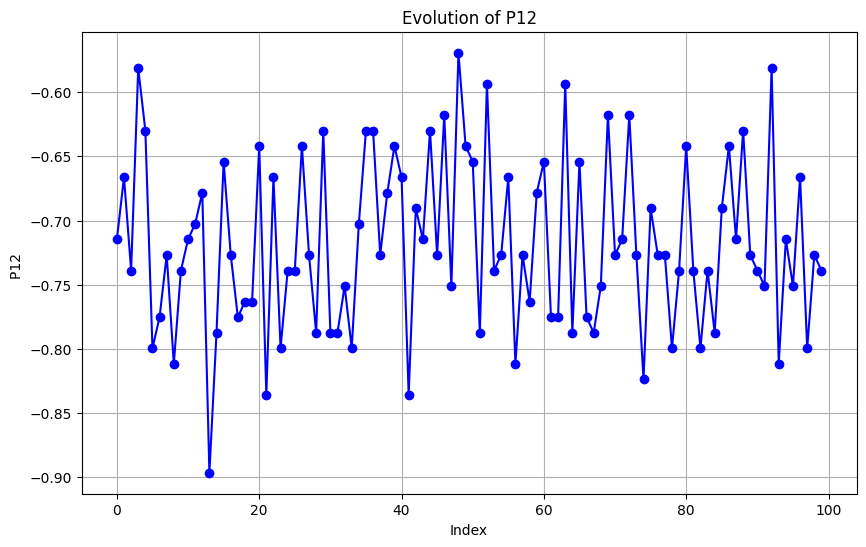

In [179]:
plt.figure(figsize=(10, 6))
plt.plot(df_pu["P12"], marker="o", linestyle="-", color="blue")
plt.title("Evolution of P12" )
plt.xlabel("Index")
plt.ylabel("P12 ")
plt.grid(True)
plt.show()

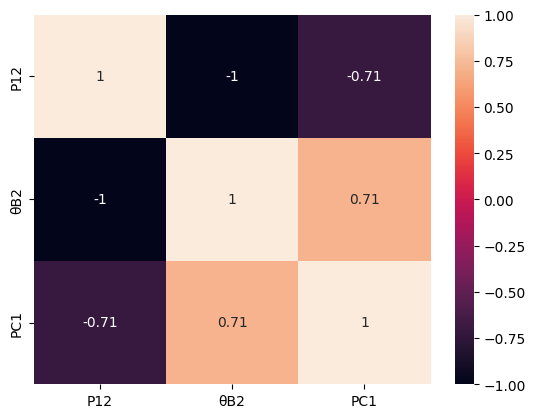

In [180]:
# Correlation analysis
correlation_matrix = df_pu[["P12", "θB2", "PC1"]].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

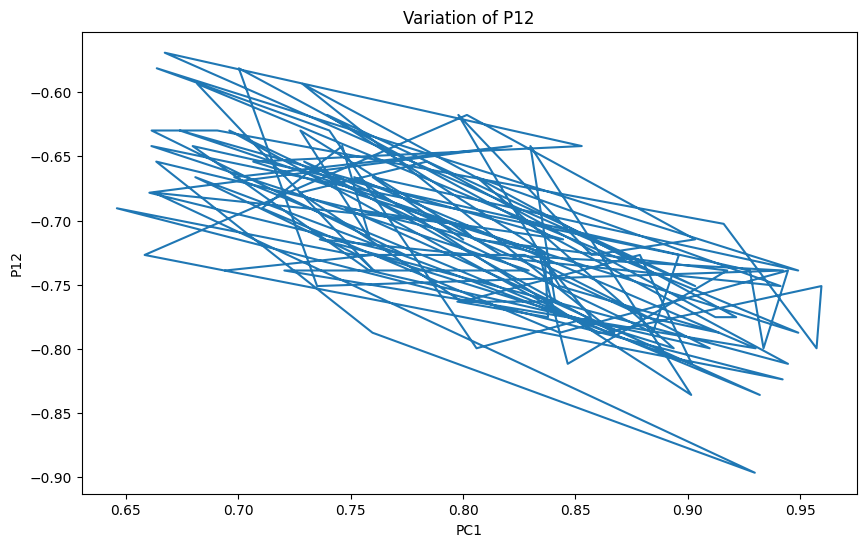

In [181]:
# Time series plot 
df_pu.set_index("PC1")["P12"].plot(title="Variation of P12", figsize=(10, 6))
plt.xlabel("PC1")
plt.ylabel("P12")
plt.show()

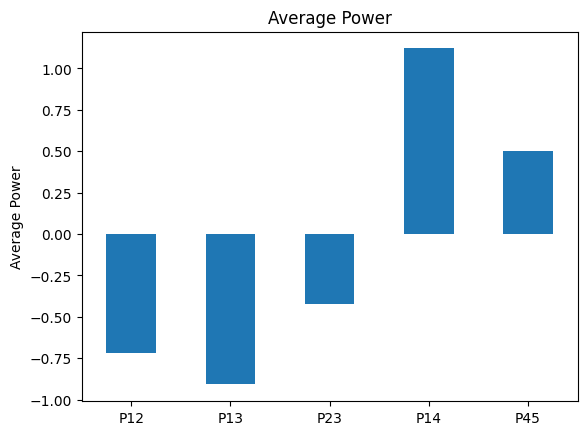

In [182]:
p_comparison = df_pu[["P12", "P13", "P23", "P14", "P45"]].mean()
p_comparison.plot(kind="bar", title="Average Power")
plt.ylabel("Average Power")
labels = p_comparison.index  
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=0)  
plt.show()